In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

DATASET = 'datasets/WASSA23_essay_level_train_preproc.tsv'
dataset = pd.read_csv(DATASET, sep='\t')
emotions = []
for perceived_emotion in dataset['emotion'].unique():
	for emotion in perceived_emotion.split('/'):
		if emotion not in emotions:
			emotions.append(emotion)
for emotion in emotions:
	dataset[emotion] = dataset["emotion"].str.lower().str.contains(emotion).astype(int)
dataset

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,distress_count,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.199801,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,2.715752,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,...,2.954012,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.035200,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and high di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,2.945490,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1.000000,1.625,"After reading the article, i felt really alarm...",fear/hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,2.804874,"An essay written by a 29 years old white male,...",The essay expresses low empathy and low distre...,The top emotions expressed in the essay are: ...,430.0,397.0,17.0,1.0,train,"After reading the article, i felt really alarm..."
2433,2.500000,1.500,It's very difficult to fathom living somewhere...,joy/sadness,2.0,7.0,1.0,38.0,42000.0,7.00,...,2.915323,An essay written by a 38 years old white femal...,The essay expresses low empathy and low distre...,The top emotions expressed in the essay are: ...,374.0,367.0,24.0,1.0,train,It's very difficult to fathom living somewhere...
2434,3.166667,2.750,it's crazy how islamic terrorism is still a th...,anger/surprise,1.0,6.0,1.0,34.0,68000.0,5.50,...,2.713512,"An essay written by a 34 years old white male,...",The essay expresses medium empathy and low dis...,The top emotions expressed in the essay are: ...,260.0,174.0,46.0,2.0,train,it's crazy how islamic terrorism is still a th...
2435,6.666667,6.375,Humans are the most selfish and wicked of all ...,disgust/neutral,1.0,7.0,1.0,28.0,165000.0,6.25,...,3.028520,"An essay written by a 28 years old white male,...",The essay expresses high empathy and high dist...,The top emotions expressed in the essay are: ...,98.0,57.0,40.0,2.0,train,Humans are the most selfish and wicked of all ...


In [3]:
def plot_emotions_distribution(data, lbl):
	data[lbl].value_counts().plot(
		kind='bar',
		xlabel=lbl,
		ylabel='Number of essays',
	)
	plt.plot()

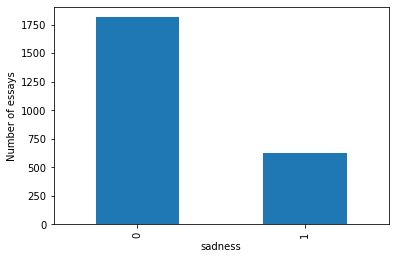

In [4]:
plot_emotions_distribution(dataset, 'sadness')

In [7]:
def resampling(data, class_label_to_upsample, n_samples):
    data_to_resample = data[data[class_label_to_upsample] == 0] 
    other_data = data[data[class_label_to_upsample] != 0]
    resampled_data = resample(
        data_to_resample,
        n_samples=n_samples
        )
    new_data = pd.concat([resampled_data, other_data])
    return new_data

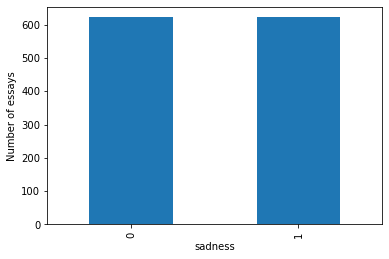

In [8]:
newdata = resampling(dataset, 'sadness', len(dataset[dataset['sadness'] == 1]))
plot_emotions_distribution(newdata, 'sadness')